<a href="https://colab.research.google.com/github/AnudeepReddy-Katta/Pytorch101/blob/main/Pytorch_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install torch

In [2]:
import torch

v0 = torch.tensor(3)
v1 = torch.tensor([1.,2.])
v2 = torch.tensor([[1.,2.],[3.,4.]])

In [3]:
print(v0)
print(v1)
print(v2)

tensor(3)
tensor([1., 2.])
tensor([[1., 2.],
        [3., 4.]])


In [4]:
import numpy as np

v0 = np.array(3)
v1 = np.array([1.,2.])
v2 = np.array([[1.,2.],[3.,4.]])

In [5]:
print(v0)
print(v1)
print(v2)

3
[1. 2.]
[[1. 2.]
 [3. 4.]]


## Numpy array to tensor

In [6]:
numpy_array = np.array([1,2,3,4])

In [7]:
t1 = torch.Tensor(numpy_array)
print(t1)
print(t1.dtype)

tensor([1., 2., 3., 4.])
torch.float32


- Constructor - same as torch.FloatTensor
- Uses float32 as default, can be changed
- All other tensor inherits from this main tensor class


In [8]:
t2 = torch.tensor(numpy_array,dtype=torch.int32,device='cpu',requires_grad=False)
print(t2)
print(t2.dtype)

tensor([1, 2, 3, 4], dtype=torch.int32)
torch.int32


- Factory Function
- Produces a new tensor with same dtype
- Does not share underlying memory with numpy
- Always copies the data

In [9]:
t3 = torch.as_tensor(numpy_array,dtype=torch.float16,device='cpu')
print(t3)
print(t3.dtype)

tensor([1., 2., 3., 4.], dtype=torch.float16)
torch.float16


In [10]:
t3.requires_grad =True # Only tensors of floating type can reqire gradients

- Factory Function
- Produces a new tensor with same dtype
- Share underlying memory with numpy, changing one will change other
- Can accepts any array like Python data structure 
- Always tried to avoid copies of the data (like using numpy's stored values directly)
- HAVE TO MANUALLY ADD requires_grad_() function, or does not support requires_grad flag. 
- Recommended to use

In [11]:
t4 = torch.from_numpy(numpy_array)
print(t4)
print(t4.dtype) 

tensor([1, 2, 3, 4])
torch.int64


- Produces a new tensor with same dtype
- Share underlying memory with numpy, changing one will change other
- Can accept only numpy arrays

### Sharing memory for performance: copy vs share

| Share Data |Copy Data |
|----|----|
|torch.as_tensor() | torch.tensor() |
|torch.from_numpy() | torch.Tensor() |   
  
> **Zero Memory Copy** ⇋ Very Efficient

### Something to keep in mind
* Since numpy.array objects are allocated on CPU, the `as_tensor()` function must copy the data from the CPU to the GPU when a GPU is being used
* The memory sharing of `as_tensor()` doesn't work with built-in Python data structure like list
* The `as_tensor()` call requires developer knowledge of the sharing feature. This is necessary so we don't make an unwanted change in the underlying data without realising it
* The `as_tensor()` performance improvement will be greater when there are a lot of back and forth operations between `numpy.array` objects and tensor objects. 




In [12]:
t5 = t4.cuda()
t5

tensor([1, 2, 3, 4], device='cuda:0')

In [13]:
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [14]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [15]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [16]:
torch.rand(2,3)

tensor([[0.6883, 0.1698, 0.2801],
        [0.4010, 0.6940, 0.9785]])

In [17]:
# Indexing is similar as numpy
t6=torch.tensor([[1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4],
                 ])
t6[1,2:]

tensor([3, 4])

## Autograd

In [18]:
from torch.autograd import grad

x1 = torch.tensor(2,dtype = torch.float16, requires_grad= True)
x2 = torch.tensor(3,dtype = torch.float16, requires_grad= True)
x3 = torch.tensor(4,dtype = torch.float16, requires_grad= True)
x4 = torch.tensor(5,dtype = torch.float16, requires_grad= True)

z = x1 * x2 + x3 * x4

In [19]:
grad(z,inputs=[x1,x2,x3,x4])

(tensor(3., dtype=torch.float16),
 tensor(2., dtype=torch.float16),
 tensor(5., dtype=torch.float16),
 tensor(4., dtype=torch.float16))

In [20]:
from torch.autograd import grad

x1 = torch.tensor(2,dtype = torch.float16, requires_grad= True)
x2 = torch.tensor(3,dtype = torch.float16, requires_grad= True)
x3 = torch.tensor(4,dtype = torch.float16, requires_grad= True)
x4 = torch.tensor(5,dtype = torch.float16, requires_grad= True)

a1 = x1 * x2 
a2 = x3 * x4

z = a1 +a2

In [21]:
z.backward(inputs=[x1,x2,x3,x4]) # values ???

## Tensor Operations

In [22]:
t = torch.tensor([
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2]
], dtype=torch.float16)

In [23]:
t.shape

torch.Size([3, 4])

In [24]:
t.size()

torch.Size([3, 4])

In [25]:
len(t.shape)

2

In [26]:
torch.tensor(t.shape).prod()

tensor(12)

In [27]:
t.numel()

12

In [28]:
t.reshape(3, 4)

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.]], dtype=torch.float16)

In [29]:
t.reshape(3, 2, 2)

tensor([[[0., 0.],
         [0., 0.]],

        [[1., 1.],
         [1., 1.]],

        [[2., 2.],
         [2., 2.]]], dtype=torch.float16)

In [30]:
t.reshape(2, 3, 2)

tensor([[[0., 0.],
         [0., 0.],
         [1., 1.]],

        [[1., 1.],
         [2., 2.],
         [2., 2.]]], dtype=torch.float16)

## Squeezing and Unsqueezing

In [31]:
print(t.reshape(1, 12))
print(t.reshape(1, 12).shape)

tensor([[0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.]], dtype=torch.float16)
torch.Size([1, 12])


In [32]:
t = t.reshape(1, 12).squeeze()
t

tensor([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.], dtype=torch.float16)

In [33]:
t.unsqueeze(dim = 0)

tensor([[0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2.]], dtype=torch.float16)

In [34]:
t.unsqueeze(dim = 1)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.]], dtype=torch.float16)

In [35]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])

t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [36]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [37]:
img1 = torch.tensor([
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1]
])

img2 = torch.tensor([
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2]
])

img3 = torch.tensor([
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3]
])

In [38]:
batch = torch.stack((img1,img2,img3)) # dim is zero by default
batch.shape

torch.Size([3, 4, 4])

In [39]:
batch = batch.reshape(3, 1, 4, 4) # no of images * channel size * dim1 * dim2
batch

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [40]:
batch[0] # image1

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [41]:
batch.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [42]:
t1 = torch.tensor([[1,1],[1,1]])
print(t1.add(2))

print(t1.sub(2))

print(t1.mul(2))

print(t1.div(2))

tensor([[3, 3],
        [3, 3]])
tensor([[-1, -1],
        [-1, -1]])
tensor([[2, 2],
        [2, 2]])
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])


In [43]:
t1 +2

tensor([[3, 3],
        [3, 3]])

In [44]:
t = torch.tensor([
    [0, 5, 7],
    [6, 0, 7],
    [0, 8, 0]
], dtype=torch.float32)

In [45]:
t.eq(0)

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [46]:
t.le(5)

tensor([[ True,  True, False],
        [False,  True, False],
        [ True, False,  True]])

In [47]:
t.ge(5)

tensor([[False,  True,  True],
        [ True, False,  True],
        [False,  True, False]])

In [48]:
t.abs()

tensor([[0., 5., 7.],
        [6., 0., 7.],
        [0., 8., 0.]])

In [49]:
t.sqrt()

tensor([[0.0000, 2.2361, 2.6458],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])

In [50]:
t.neg()

tensor([[-0., -5., -7.],
        [-6., -0., -7.],
        [-0., -8., -0.]])

## Reduction Functions

In [51]:
t.sum()

tensor(33.)

In [52]:
t.mean()

tensor(3.6667)

In [53]:
t.prod()

tensor(0.)

In [54]:
t.std()

tensor(3.5707)

In [55]:
t.sum(dim=0)

tensor([ 6., 13., 14.])

In [56]:
t.sum(dim=1)

tensor([12., 13.,  8.])

In [57]:
t.argmax(), t.max()

(tensor(7), tensor(8.))

In [58]:
t.argmin(), t.min()

(tensor(0), tensor(0.))

In [59]:
t.flatten()

tensor([0., 5., 7., 6., 0., 7., 0., 8., 0.])

# Bulding a Neural Network

**Pipeline**
- Prepare
- Build
- Train
- Analyze

In [60]:
import torch
import torchvision # Provides access to datasets, models, transforms, utils...
import torchvision.transforms as transforms

In [61]:
train_set = torchvision.datasets.FashionMNIST(
    root= './data',
    train = True,
    download = True,
    transform = transforms.Compose([
                                    transforms.ToTensor()
    ])
)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [62]:
train_loader = torch.utils.data.dataloader.DataLoader(dataset = train_set, batch_size = 32, shuffle = True)

In [63]:
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [64]:
batch = next(iter(train_loader))
images, labels = batch

labels: tensor([6, 3, 7, 0, 7, 6, 0, 8, 3, 0, 7, 2, 0, 9, 7, 6, 3, 6, 6, 9, 0, 0, 0, 1,
        4, 0, 6, 1, 1, 9, 3, 1])


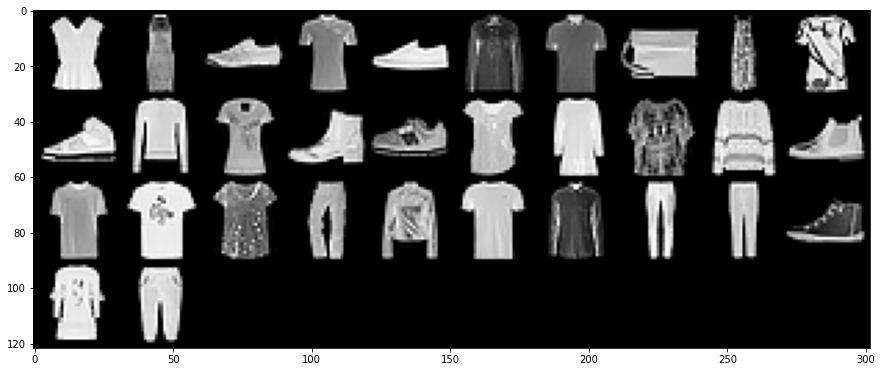

In [65]:
import matplotlib.pyplot as plt
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)
#Numpy and Matplotlib actually represents 3 dimension in x,y,z format.
#Whereas pytorch represents them as z,x,y. So with (np.transpose(img, (1, 2, 0)) we are telling numpy the mapping of the indexed.

## Building a network

In [66]:
import torch.nn as nn

In [67]:
class Network(nn.Module):

  def __init__(self):
    super().__init__() # ?
    self.layer = None

  def forward(self,t):
    t = self.layer(t)
    return t

In [68]:
images.shape

torch.Size([32, 1, 28, 28])

In [69]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [70]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [71]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [73]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 47729 loss: 1039.692470625043
epoch 1 total_correct: 50633 loss: 802.7724058106542
epoch 2 total_correct: 51140 loss: 754.4451052471995
epoch 3 total_correct: 51403 loss: 735.946096085012
epoch 4 total_correct: 51614 loss: 721.634546931833
epoch 5 total_correct: 51704 loss: 712.7816323079169
epoch 6 total_correct: 51691 loss: 724.1327496767044
epoch 7 total_correct: 51965 loss: 702.573773438111
epoch 8 total_correct: 51893 loss: 702.297063883394
epoch 9 total_correct: 52004 loss: 699.2345901355147
